**Import necessary libraries**

In [771]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import sklearn
import pickle

**Read the data and show describtion**

In [742]:
df = pd.read_csv("/content/Admission_Predict.csv")

In [241]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [243]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Plotting **

Serial No.              AxesSubplot(0.125,0.657941;0.227941x0.222059)
GRE Score            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
TOEFL Score          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
University Rating       AxesSubplot(0.125,0.391471;0.227941x0.222059)
SOP                  AxesSubplot(0.398529,0.391471;0.227941x0.222059)
LOR                  AxesSubplot(0.672059,0.391471;0.227941x0.222059)
CGPA                       AxesSubplot(0.125,0.125;0.227941x0.222059)
Research                AxesSubplot(0.398529,0.125;0.227941x0.222059)
Chance of Admit         AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

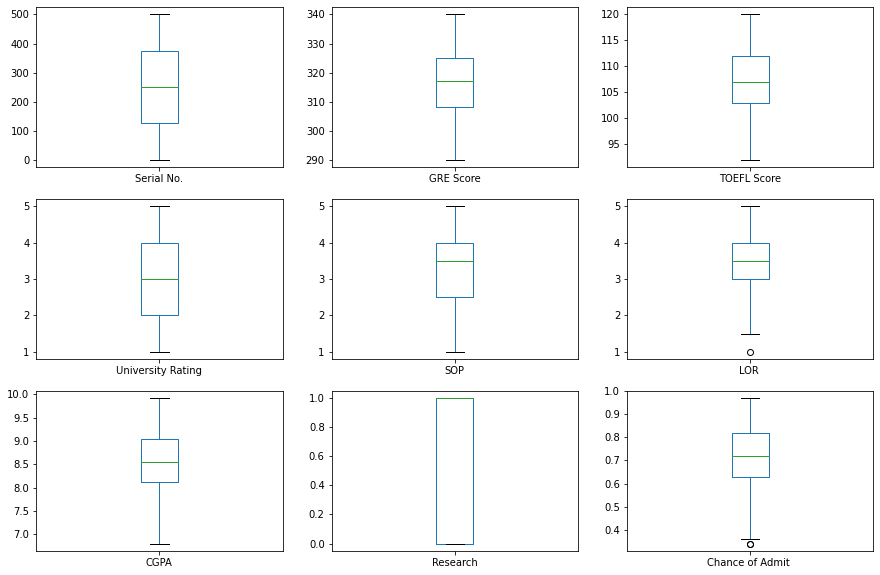

In [743]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10))

**Outliers...**

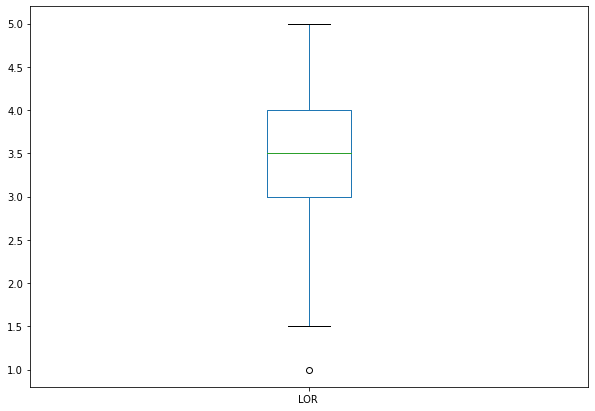

In [744]:
df['LOR '].plot(kind='box',figsize=(10,7))

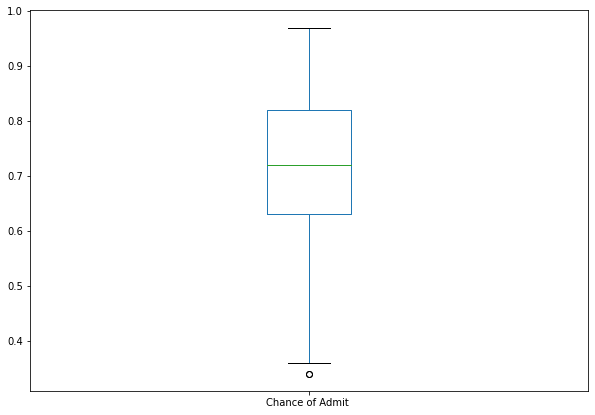

In [745]:
df['Chance of Admit '].plot(kind='box',figsize=(10,7))

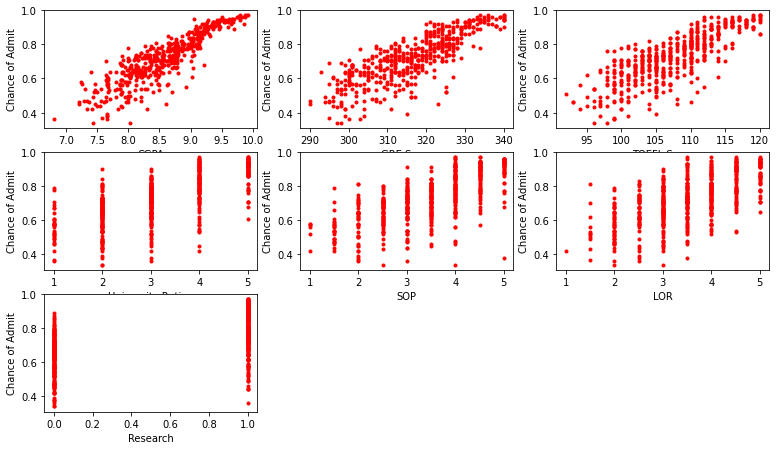

In [746]:
plt.subplots(figsize=(13,10))
plt.subplot(4,3,1)

plt.scatter(x=df['CGPA'], y=df['Chance of Admit '], c='r', marker='.')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

plt.subplot(4,3,2)
plt.scatter(x=df['GRE Score'], y=df['Chance of Admit '], c='r', marker='.')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

plt.subplot(4,3,3)
plt.scatter(x=df['TOEFL Score'], y=df['Chance of Admit '], c='r', marker='.')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')

plt.subplot(4,3,4)
plt.scatter(x=df['University Rating'], y=df['Chance of Admit '], c='r', marker='.')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')

plt.subplot(4,3,5)
plt.scatter(x=df['SOP'], y=df['Chance of Admit '], c='r', marker='.')
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')

plt.subplot(4,3,6)
plt.scatter(x=df['LOR '], y=df['Chance of Admit '], c='r', marker='.')
plt.xlabel('LOR')
plt.ylabel('Chance of Admit')

plt.subplot(4,3,7)
plt.scatter(x=df['Research'], y=df['Chance of Admit '], c='r', marker='.')
plt.xlabel('Research')
plt.ylabel('Chance of Admit')


plt.show()

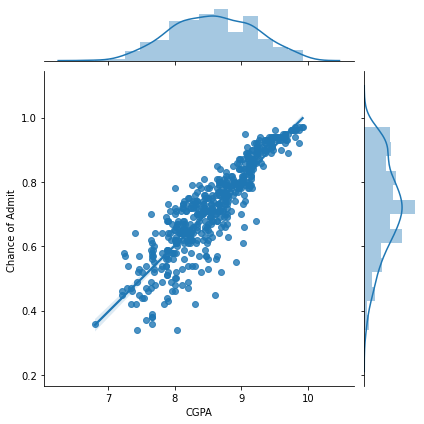

In [749]:
sns.jointplot('CGPA','Chance of Admit ',data=df,kind='reg')

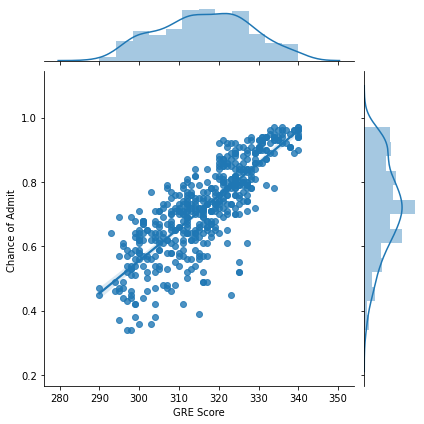

In [750]:
sns.jointplot('GRE Score','Chance of Admit ',data=df,kind='reg')

In [751]:
Correlation = df.corr()
Correlation

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


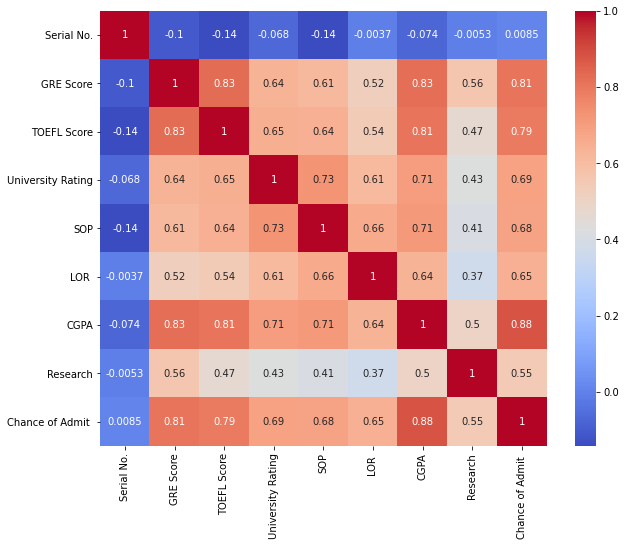

In [752]:
plt.subplots(figsize=(10, 8))
sns.heatmap(Correlation, xticklabels=Correlation.columns, yticklabels=Correlation.columns, annot=True, cmap='coolwarm')

**Cleaning the data**

**Remove Unique Columns**

In [791]:
df.drop(columns=["Serial No."],inplace=True)

In [792]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Scaling the data**

In [794]:
scaler = StandardScaler()

In [795]:
nums = ['GRE Score','TOEFL Score','CGPA','LOR ','SOP']
df[nums] = scaler.fit_transform(df[nums])

In [255]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,4,1.137360,1.098944,1.776806,1,0.92
1,0.667148,-0.031601,4,0.632315,1.098944,0.485859,1,0.76
2,-0.041830,-0.525364,3,-0.377773,0.017306,-0.954043,1,0.72
3,0.489904,0.462163,3,0.127271,-1.064332,0.154847,1,0.80
4,-0.219074,-0.689952,2,-1.387862,-0.523513,-0.606480,0,0.65


**Splitting the data as 
x --> input
y --> target**

In [797]:
x = df.drop("Chance of Admit ",axis=1)
y = df["Chance of Admit "]

In [257]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,4,1.137360,1.098944,1.776806,1
1,0.667148,-0.031601,4,0.632315,1.098944,0.485859,1
2,-0.041830,-0.525364,3,-0.377773,0.017306,-0.954043,1
3,0.489904,0.462163,3,0.127271,-1.064332,0.154847,1
4,-0.219074,-0.689952,2,-1.387862,-0.523513,-0.606480,0
...,...,...,...,...,...,...,...
495,1.376126,0.132987,5,1.137360,0.558125,0.734118,1
496,1.819238,1.614278,5,1.642404,1.639763,2.140919,1
497,1.198882,2.108041,5,1.137360,1.639763,1.627851,1
498,-0.396319,-0.689952,4,0.632315,1.639763,-0.242367,0


**Splitting the Data as train, test**

In [798]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=38)

**Applying Algorithms**

**Decision Tree**

In [259]:
DT = DecisionTreeRegressor()

In [260]:
DT.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [261]:
predDT = DT.predict(X_test)

In [262]:
print( mean_absolute_error(Y_test,predDT), mean_squared_error(Y_test,predDT), r2_score(Y_test,predDT))

0.06406666666666666 0.008707333333333333 0.5822230429746342


**Applying cross validation**

In [263]:
scores = cross_val_score(DT, x, y, cv=5)

In [264]:
final_score = sum(scores)/len(scores)

In [265]:
final_score

0.5723978343548787

**KNN**

In [561]:
KN = KNeighborsRegressor(n_neighbors=4, weights='uniform', algorithm='brute')

In [562]:
KN.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [563]:
predKN = KN.predict(X_test)

In [564]:
KN.score(X_train,Y_train)

0.8486166221228749

In [565]:
print( mean_absolute_error(Y_test,predKN), mean_squared_error(Y_test,predKN), r2_score(Y_test,predKN))

0.04360000000000001 0.00366175 0.8275642761704957


In [270]:
scores = cross_val_score(KN, x, y, cv=5)

In [271]:
final_score = sum(scores)/len(scores)
final_score

0.7549550538521848

**Random Forest**

In [375]:
RF = RandomForestRegressor(n_estimators=300, random_state=44, criterion='mae', max_features=3)

In [376]:
RF.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=44, verbose=0, warm_start=False)

In [377]:
predRF = RF.predict(X_test)

In [378]:
RF.score(X_train,Y_train)

0.9652094061488382

In [379]:
print( mean_absolute_error(Y_test,predRF), mean_squared_error(Y_test,predRF), r2_score(Y_test,predRF))

0.04034822222222229 0.00349652682592593 0.8353448121477935


In [311]:
scores = cross_val_score(RF, x, y, cv=5)

In [312]:
final_score = sum(scores)/len(scores)
final_score

0.7956763270832831

**SVR**

In [918]:
svr = SVR(kernel='linear', degree=9, max_iter=300, C=0.09)

In [919]:
svr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=0.09, cache_size=200, coef0=0.0, degree=9, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=300, shrinking=True, tol=0.001, verbose=False)

In [920]:
predsvr = svr.predict(X_test)

In [921]:
r2_score(Y_test,predsvr)  

0.8036834457003572

In [922]:
scores = cross_val_score(svr, x, y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [923]:
final_score = sum(scores)/len(scores)
final_score

0.7377230267319409

**SGD**

In [278]:
sgd = SGDRegressor(alpha=0.00000001, early_stopping=True)

In [279]:
sgd.fit(X_train,Y_train)

SGDRegressor(alpha=1e-08, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [280]:
predsgd = sgd.predict(X_test)

In [281]:
print( mean_absolute_error(Y_test,predsgd), mean_squared_error(Y_test,predsgd), r2_score(Y_test,predsgd))

0.08373355417645129 0.011373279353572102 0.45431122734842966


**XGB**

In [591]:
XGB = XGBRegressor(max_depth=3,learning_rate=0.04)

In [592]:
XGB.fit(X_train,Y_train)

[19:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [593]:
predXGB = XGB.predict(X_test)

In [594]:
XGB.score(X_train,Y_train)

0.8758451061574541

In [595]:
XGB.score(X_test,Y_test)

0.8262319998823096

In [928]:
print( mean_absolute_error(Y_test,predXGB), mean_squared_error(Y_test,predXGB), r2_score(Y_test,predXGB))

0.04363345896402995 0.0036900414850236534 0.8262319998823096


**Features Importance**

In [610]:
importances = XGB.feature_importances_

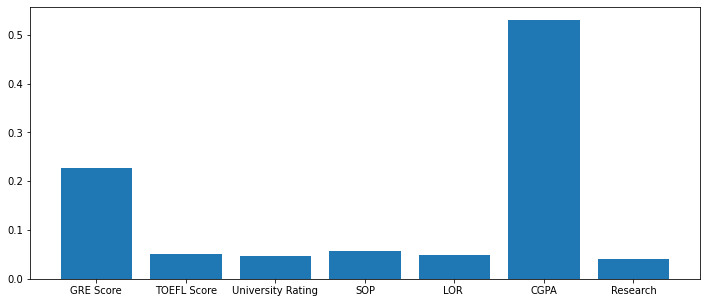

In [643]:
plt.subplots(figsize=(12,5))
plt.bar( range(len(importances)), importances)
plt.xticks(range(len(importances)), df.columns)
plt.show()


**Learning Curves**

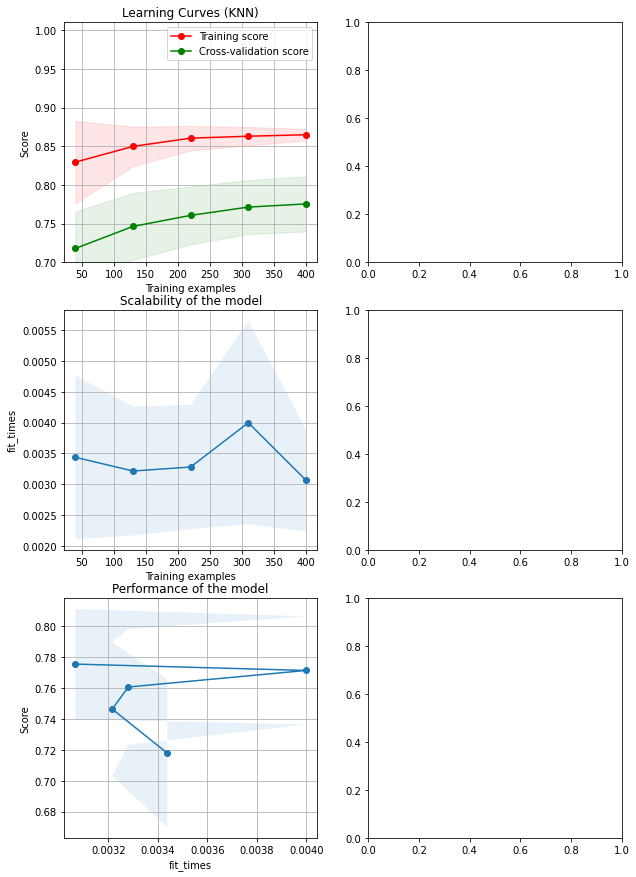

In [574]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (KNN)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=37)

estimator = KNeighborsRegressor(n_neighbors=4, weights='uniform', algorithm='brute')
plot_learning_curve(estimator, title, x, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)



plt.show()

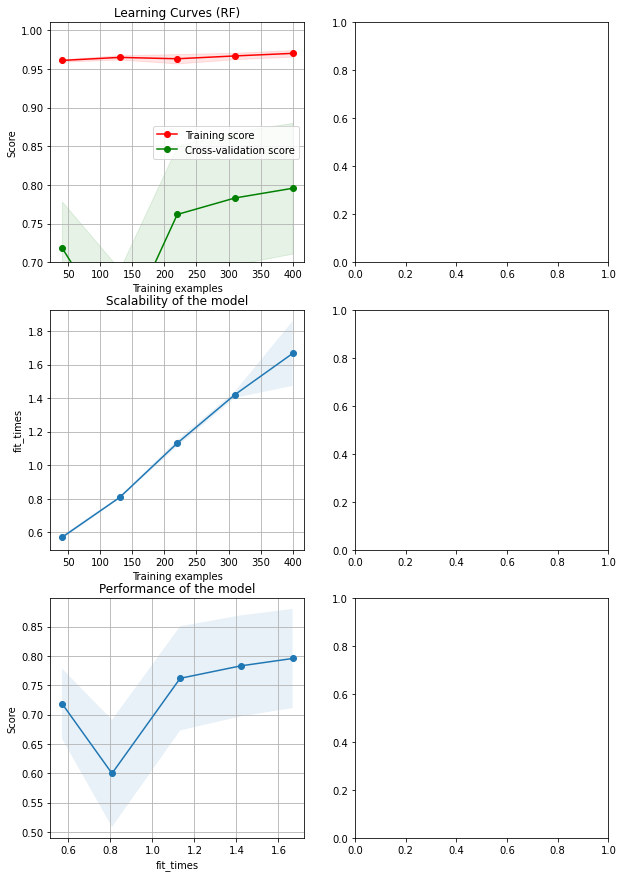

In [503]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (RF)"

#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=37)

estimator = RandomForestRegressor(n_estimators=300, random_state=44, criterion='mae', max_features=3)
plot_learning_curve(estimator, title, x, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=5, n_jobs=2)



plt.show()

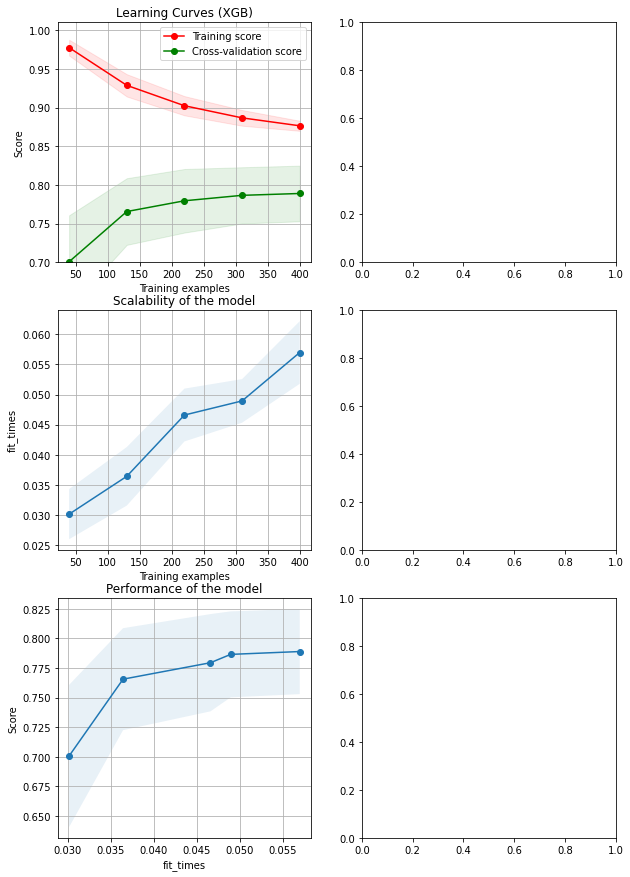

In [573]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (XGB)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=37)

estimator = XGB = XGBRegressor(max_depth=3,learning_rate=0.04)
plot_learning_curve(estimator, title, x, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)



plt.show()

In [658]:
train_sizes, train_scores, test_scores = learning_curve(XGB,x,y,cv=10,scoring='neg_mean_squared_error' ,train_sizes= np.linspace(0.01,1.0), verbose=1)

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   11.6s finished


In [654]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [659]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)

test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

No handles with labels found to put in legend.


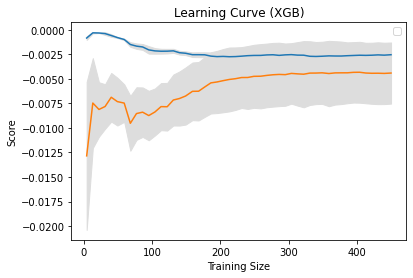

In [660]:
plt.plot(train_sizes,train_mean)
plt.plot(train_sizes,test_mean)

plt.fill_between(train_sizes,train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes,test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.title('Learning Curve (XGB)')
plt.xlabel("Training Size")
plt.ylabel('Score')
plt.legend(loc='best')


**Prediction Errors**

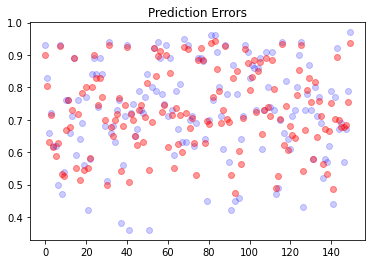

In [926]:
_,ax = plt.subplots()

ax.scatter(x=range(0,Y_test.size), y=Y_test, color='b', label='Actual', alpha=0.2)
ax.scatter(x=range(0,predXGB.size), y=predXGB, color='r', label='Predicted', alpha=0.4)
plt.title('Prediction Errors')
plt.show()

**Saving The Model**

In [927]:
pickle.dump(XGB,open("Admission_model.sav","wb"))